<a href="https://colab.research.google.com/github/TheGAITORClub/Resources/blob/KyleDampier/Lectures/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load Data from GitHub
housing_test = pd.read_csv('https://raw.githubusercontent.com/TheGAITORClub/Resources/KyleDampier/Lectures/Data/titanic_test.csv')
housing_train = pd.read_csv('https://raw.githubusercontent.com/TheGAITORClub/Resources/KyleDampier/Lectures/Data/titanic_train.csv')

In [3]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
housing_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The goal of this dataset it to predict the `Survived` column

In [5]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Step 1 - Visualization

## Categorizing Data

In [6]:
# housing_train['Survived'] = housing_train['Survived'].astype('category')

## By Gender

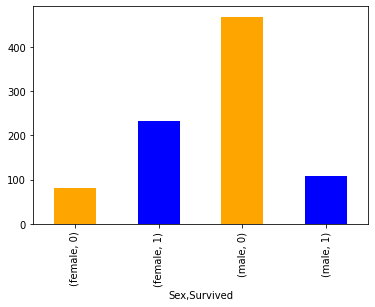

In [7]:
# convert to category
housing_train['Sex'] = housing_train['Sex'].astype('category')

count_gender_survived = housing_train.groupby(['Sex', 'Survived']).size()
count_gender_survived.plot.bar(x='Sex', y='Survived', color=['orange', 'blue'])

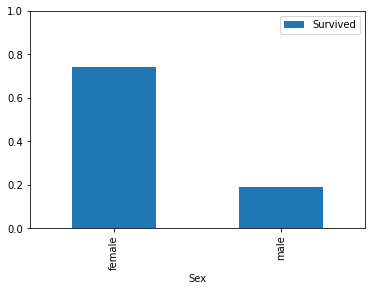

In [8]:
mean_gender_survived = housing_train.groupby('Sex').agg({"Survived": np.mean})
mean_gender_survived.plot.bar(ylim=(0, 1))

# By Age

## Age Groups

From [here](https://www.statcan.gc.ca/en/concepts/definitions/age2)

- \< 15 years
- 16-30 years
- 31-45 years
- 46-60 years
- 61-75 years
- \> 75 years




In [9]:
# categorize the data

housing_train['AgeRange'] = pd.cut(housing_train['Age'], bins=range(0, 100, 10), include_lowest=True)
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeRange     714 non-null    category
dtypes: category(2), float64(2), int64(5), object(4)
memory usage: 79.0+ KB


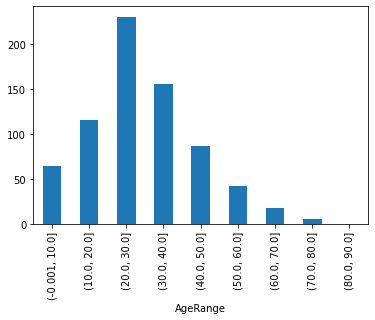

In [10]:
count_age = housing_train.groupby('AgeRange').size()
count_age.plot.bar(x='AgeRange', y='Survived')

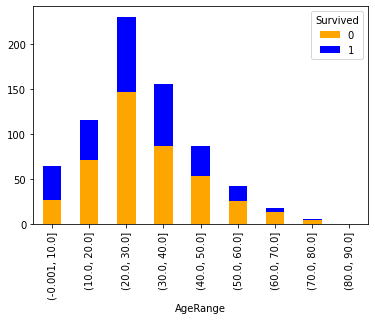

In [27]:
count_age_survived = housing_train.groupby(['AgeRange', 'Survived']).size().unstack()
count_age_survived.plot.bar(color=['orange', 'blue'], stacked=True)

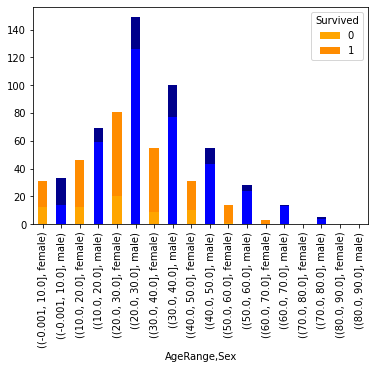

In [36]:
count_age_sex = housing_train.groupby(['AgeRange', 'Sex', 'Survived']).size().unstack()
count_age_sex.plot.bar(color=[['orange', 'blue'], ['darkorange', 'darkblue']], stacked=True)

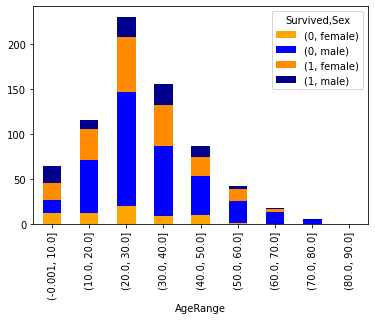

In [33]:
count_age_sex.unstack().plot.bar(color=['orange', 'blue', 'darkorange', 'darkblue'], stacked=True)